In [3]:
import argparse
import logging
import os

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

from unet import UNet
from utils.data_vis import plot_img_and_mask
from utils.dataset import BasicDataset
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
import cv2

import random

In [4]:
def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5):
    net.eval()

    img = torch.from_numpy(BasicDataset.preprocess(full_img, scale_factor))

    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)

    with torch.no_grad():
        output = net(img)

        print(output.shape)
        #if net.n_classes > 1:
        #    probs = F.softmax(output, dim=1)
        #else:
        #    probs = torch.sigmoid(output)
        probs_0 = torch.sigmoid(output[:, 0, :, :])
        probs_1 = torch.sigmoid(output[:, 1, :, :])

        probs_0 = probs_0.squeeze(0)
        probs_1 = probs_1.squeeze(0)

        tf = transforms.Compose(
            [
                transforms.ToPILImage(),
                transforms.Resize(full_img.width),#size[1]),
                transforms.ToTensor()
            ]
        )

        probs_0 = tf(probs_0.cpu())
        probs_1 = tf(probs_1.cpu())
        mask_0 = probs_0.squeeze().cpu().numpy()
        mask_1 = probs_1.squeeze().cpu().numpy()
        full_mask = np.array([mask_0, mask_1])#probs.squeeze().cpu().numpy()

    return full_mask# > out_threshold


In [5]:
def get_output_filenames(args):
    in_files = args.input
    out_files = []

    if not args.output:
        for f in in_files:
            pathsplit = os.path.splitext(f)
            out_files.append("{}_OUT{}".format(pathsplit[0], pathsplit[1]))
    elif len(in_files) != len(args.output):
        logging.error("Input files and output files are not of the same length")
        raise SystemExit()
    else:
        out_files = output

    return out_files

In [6]:
def mask_to_image(mask):
    return Image.fromarray((mask * 255).astype(np.uint8))

In [7]:
scale = 0.5
mask_threshold = 0.5 #минимальная вероятность для рассматривания пикселя на маску

no_save = True
viz = False

In [8]:
model = 'ckpts_dir/mid_ckpts/CP_epoch700.pth'

# /CP_epoch200.pth - класс!

net = UNet(n_channels=1, n_classes=2)

logging.info("Loading model {}".format(model))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')
net.to(device=device)
net.load_state_dict(torch.load(model, map_location=device))

logging.info("Model loaded !")

## bad score

In [11]:
infile_list = [
'/home/karina/T2_Sag_Mid/test_data/imgs/00044.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00006.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00104.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00045.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00181.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00126.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00184.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00007.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00028.PNG',
'/home/karina/T2_Sag_Mid/test_data/imgs/00127.PNG'
]

In [12]:
inmask_list = [
'/home/karina/T2_Sag_Mid/test_data/masks/00044.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00006.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00104.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00045.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00181.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00126.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00184.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00007.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00028.PNG',
'/home/karina/T2_Sag_Mid/test_data/masks/00127.PNG'    
]

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902
 0.32941177 0.33333334

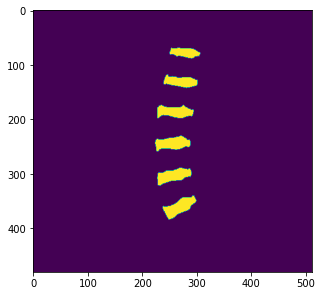

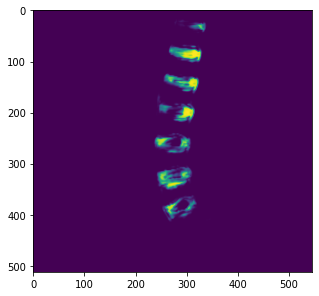

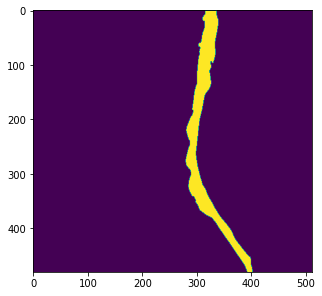

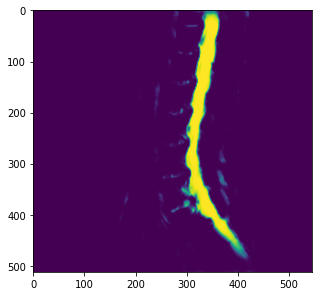

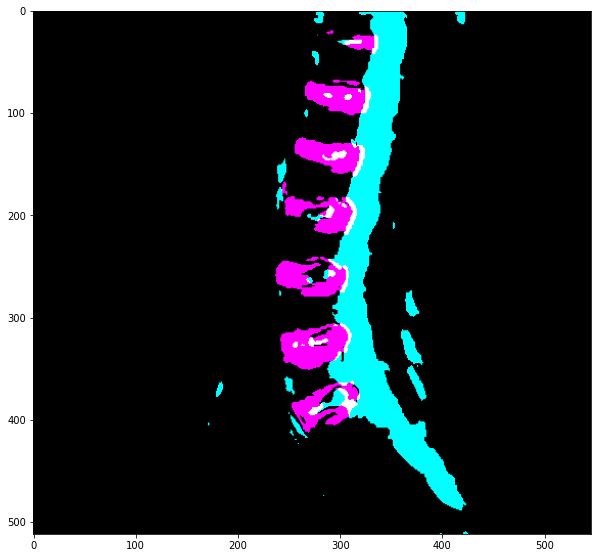

<Figure size 1440x1440 with 0 Axes>

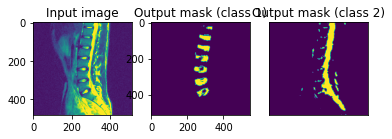

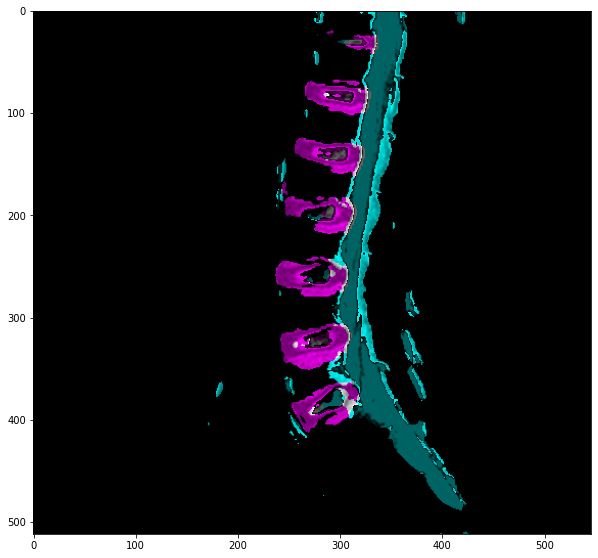

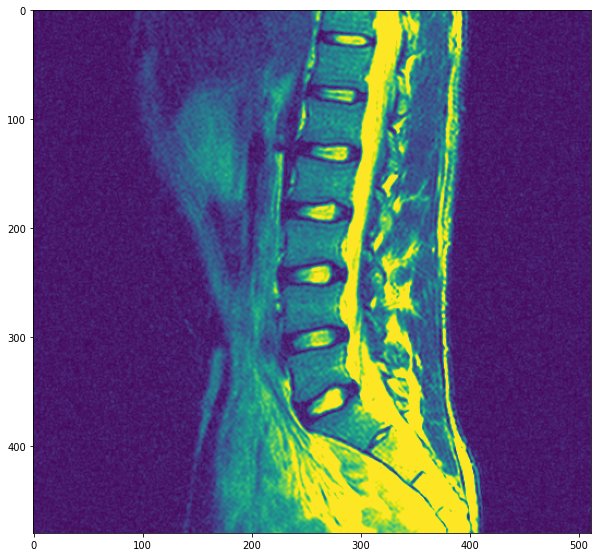

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

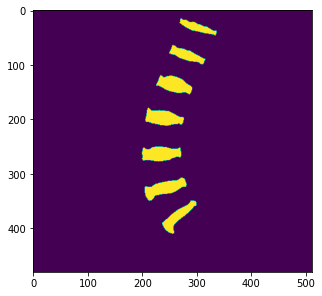

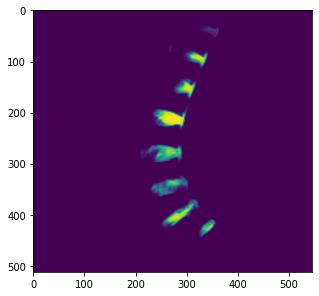

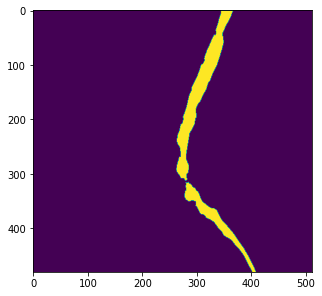

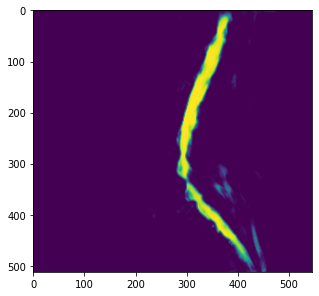

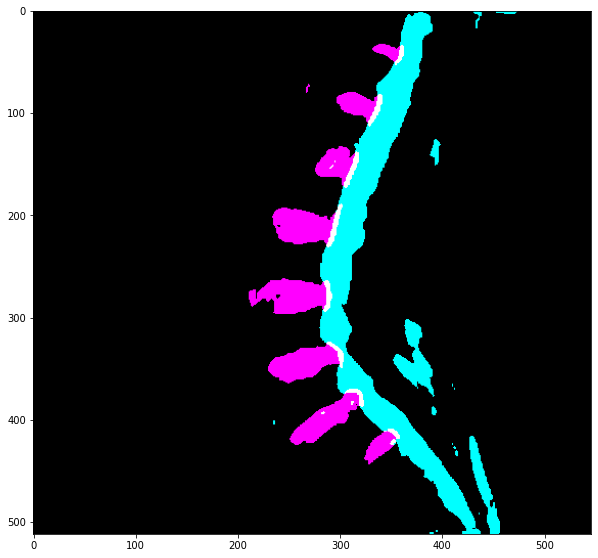

<Figure size 1440x1440 with 0 Axes>

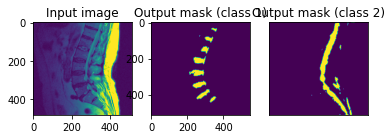

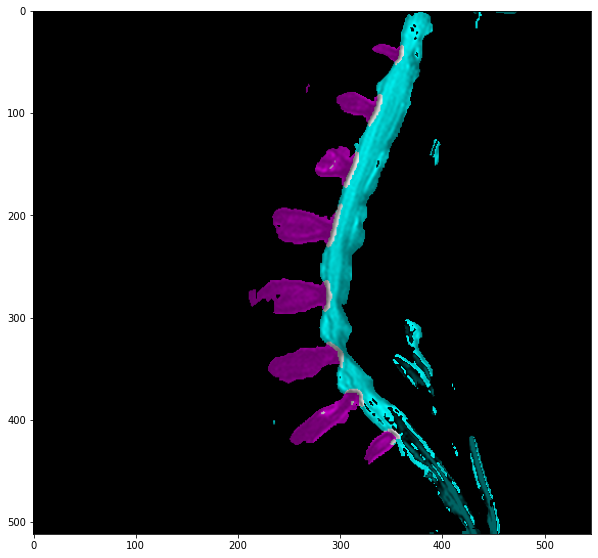

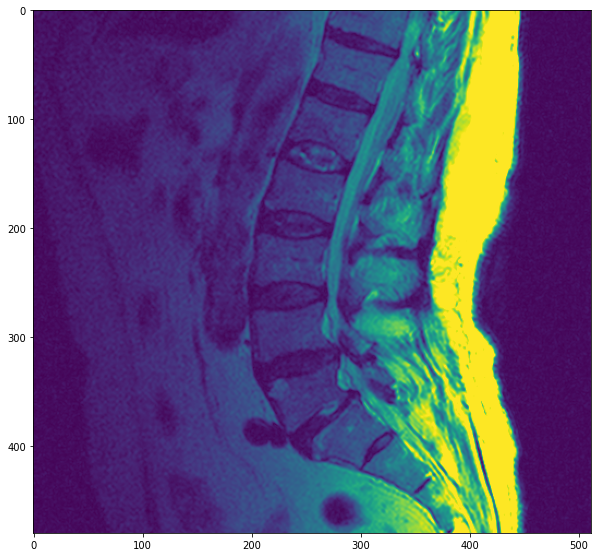

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

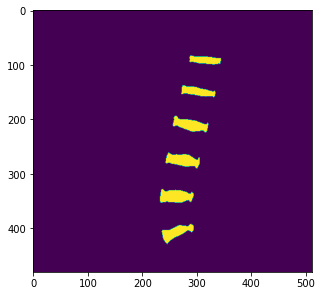

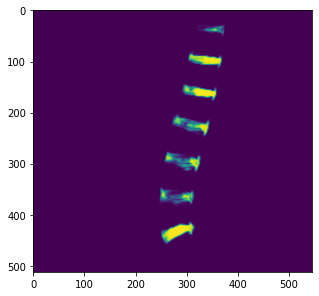

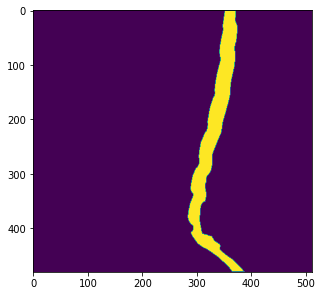

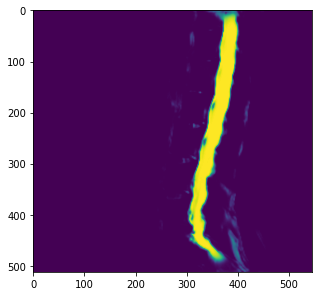

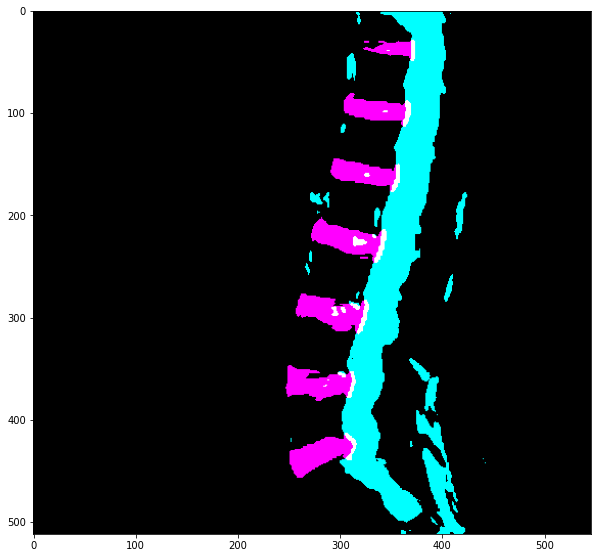

<Figure size 1440x1440 with 0 Axes>

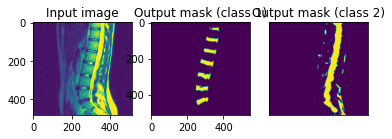

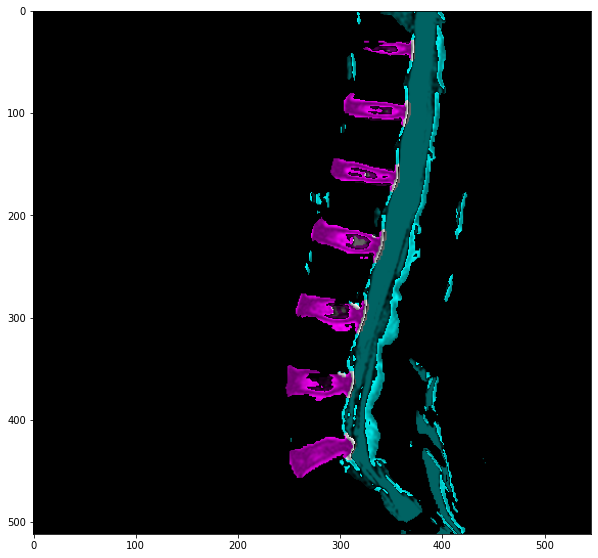

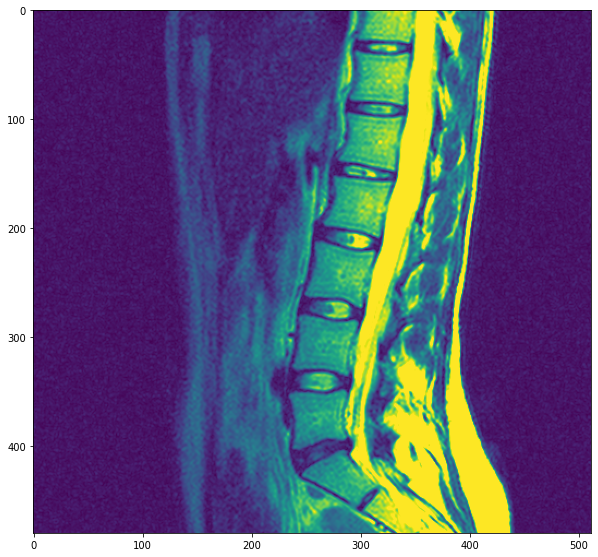

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

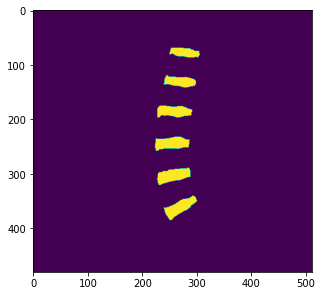

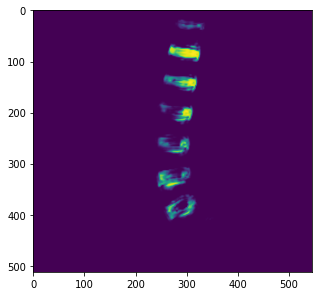

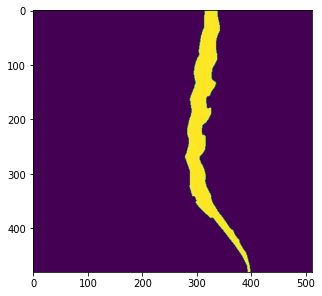

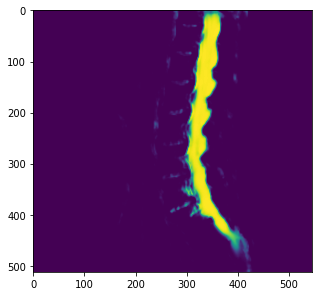

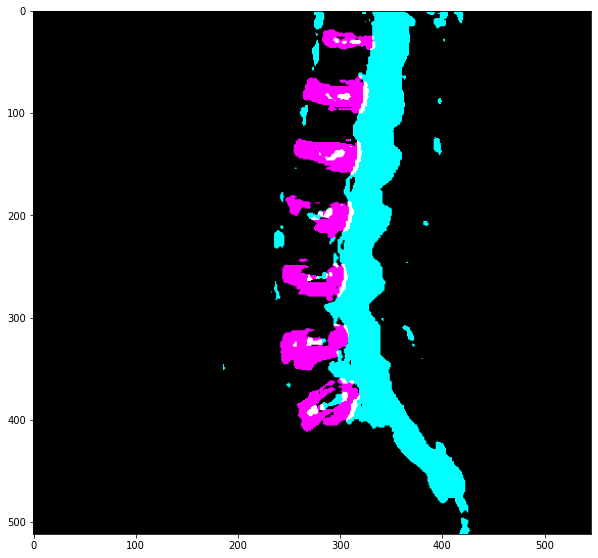

<Figure size 1440x1440 with 0 Axes>

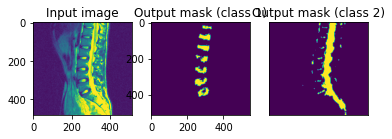

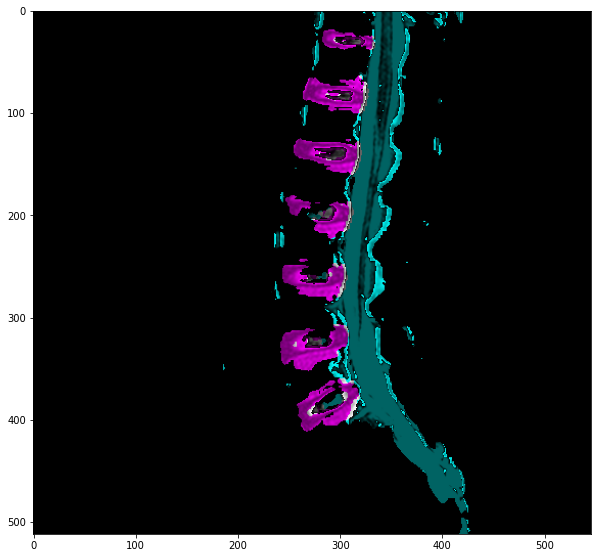

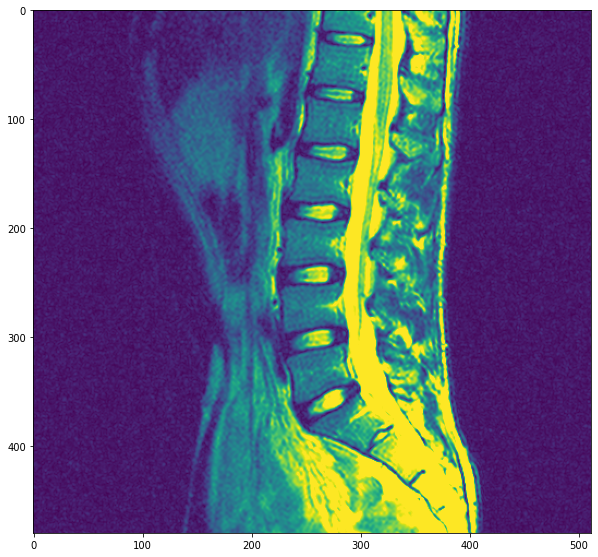

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

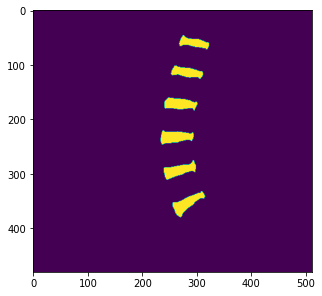

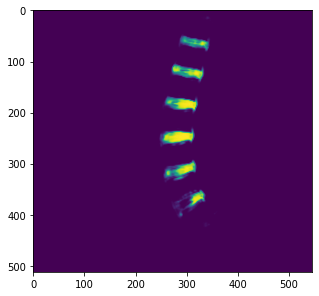

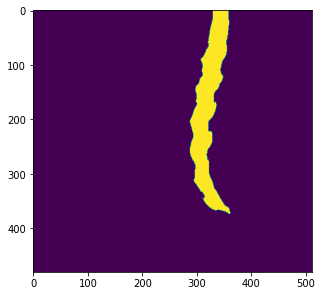

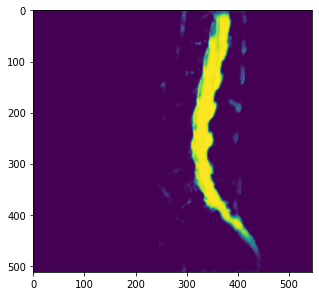

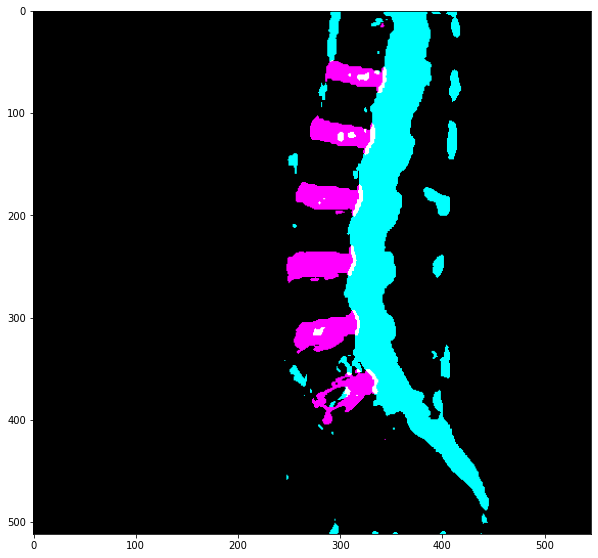

<Figure size 1440x1440 with 0 Axes>

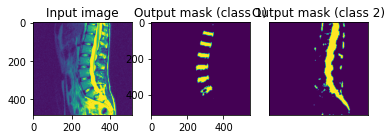

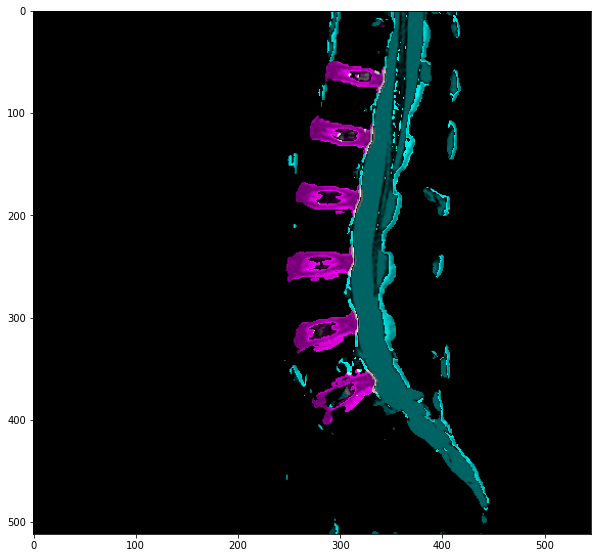

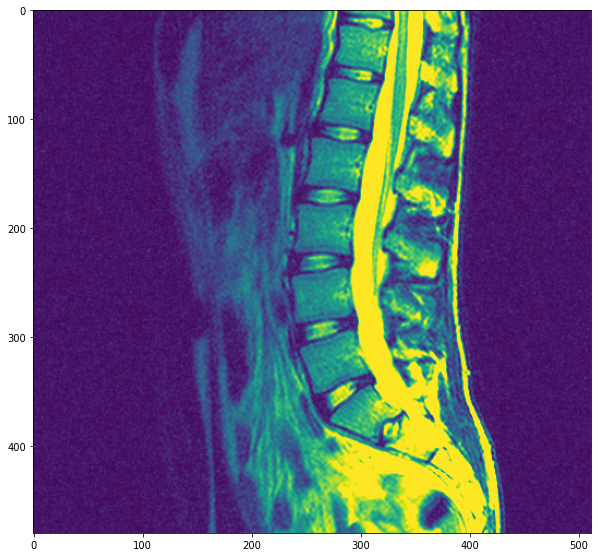

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

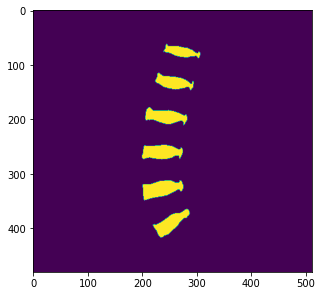

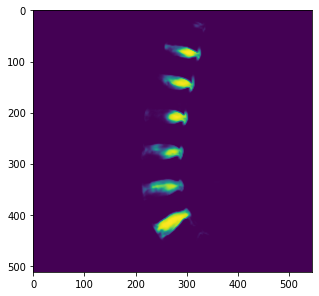

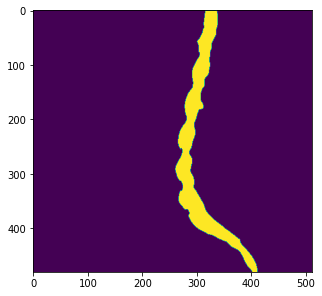

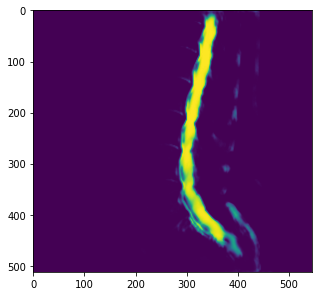

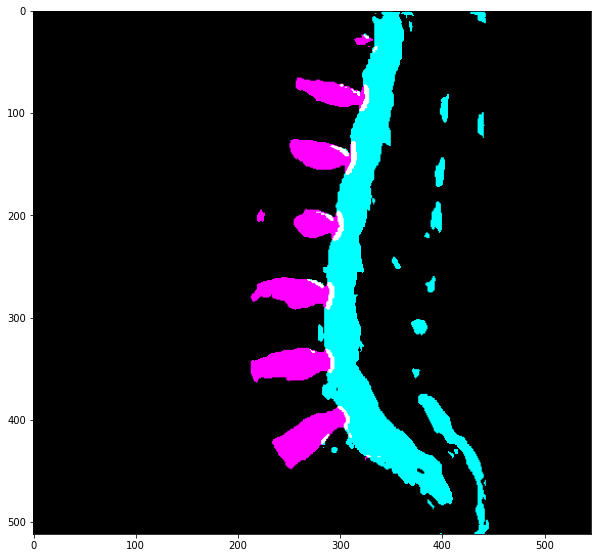

<Figure size 1440x1440 with 0 Axes>

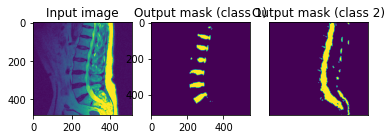

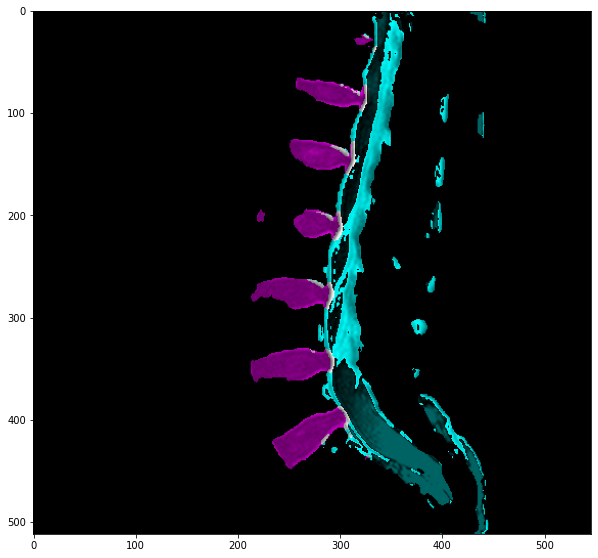

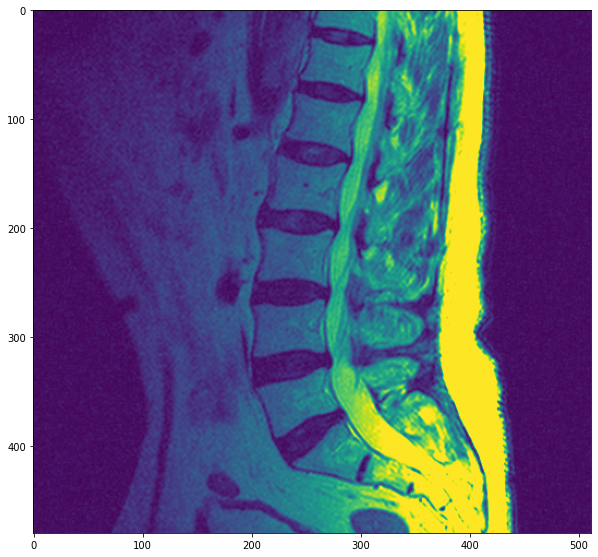

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

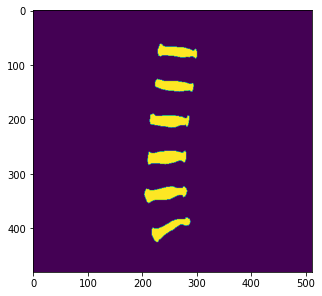

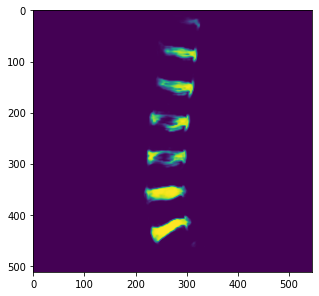

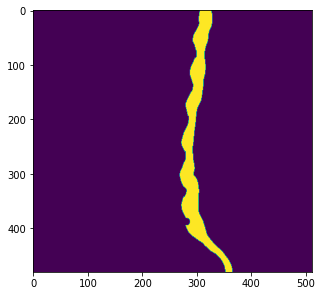

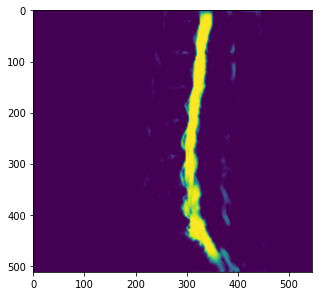

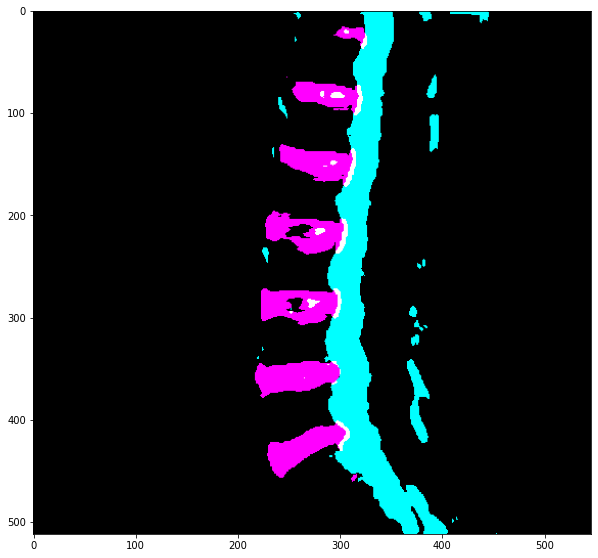

<Figure size 1440x1440 with 0 Axes>

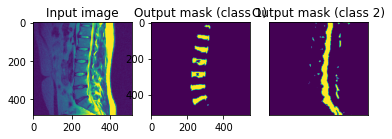

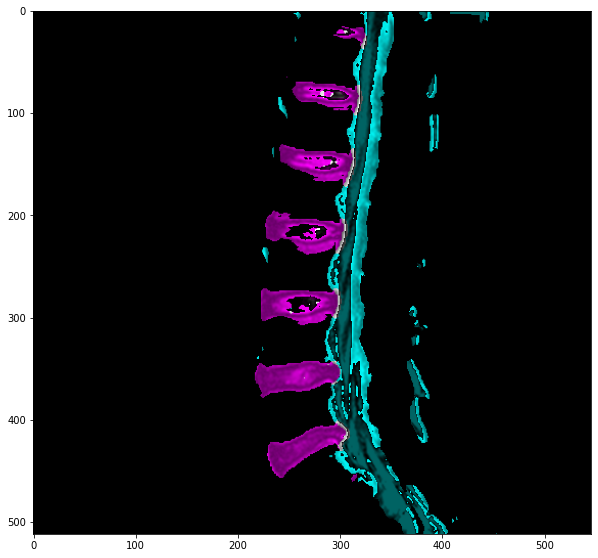

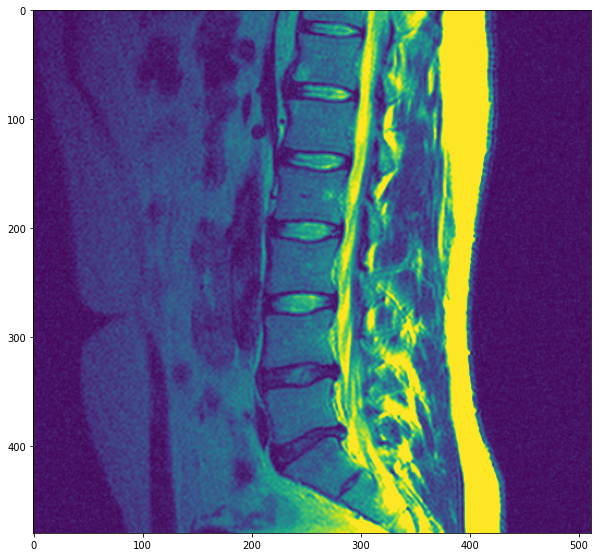

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

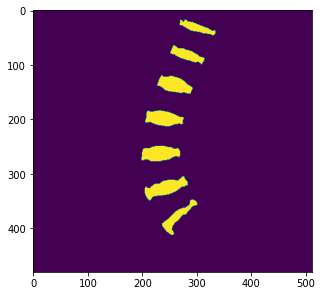

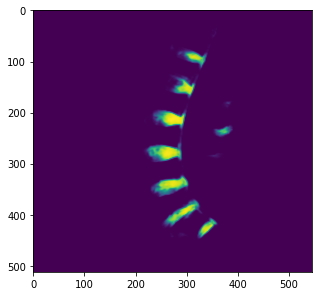

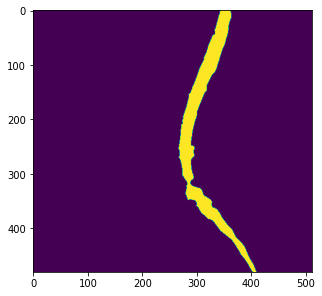

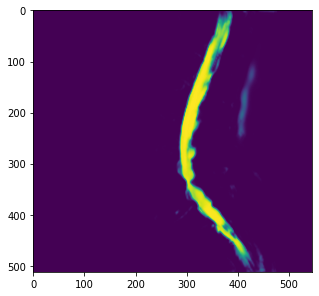

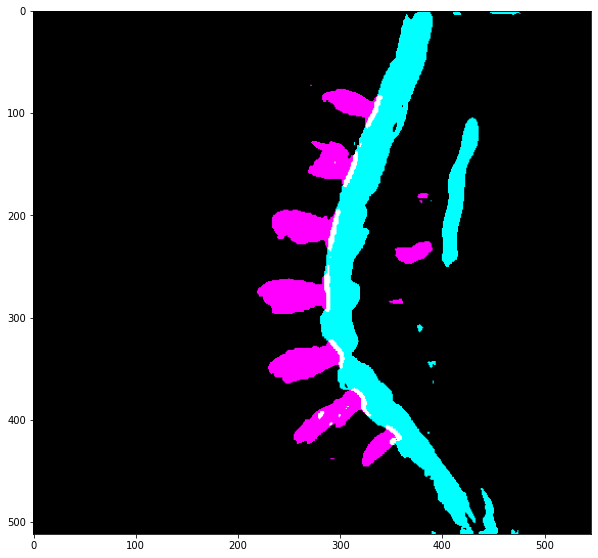

<Figure size 1440x1440 with 0 Axes>

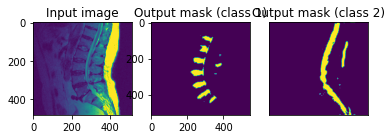

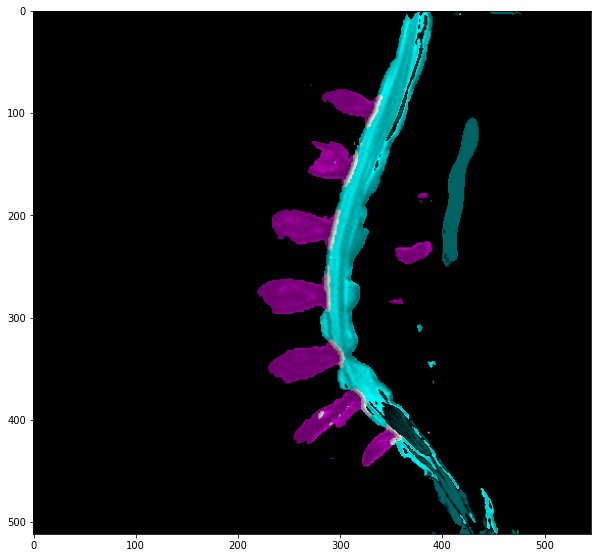

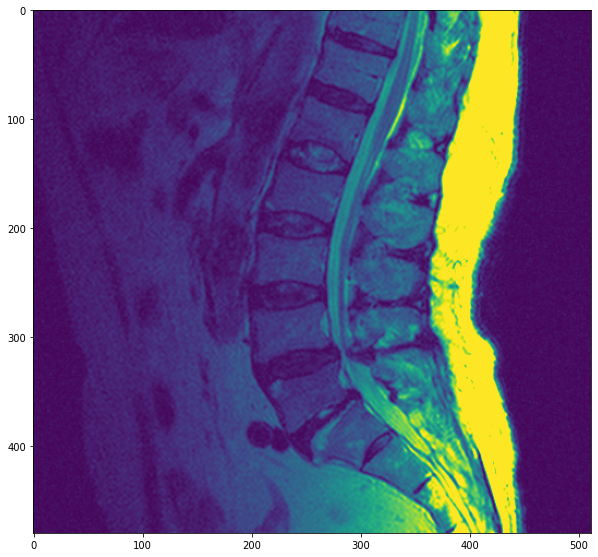

------------------------------------------------------------------------------------------

torch.Size([1, 2, 158, 160])
(2, 320, 324)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

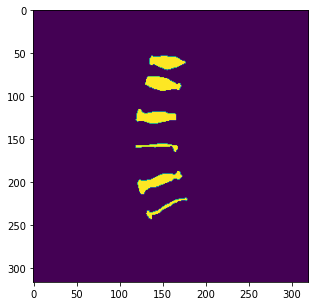

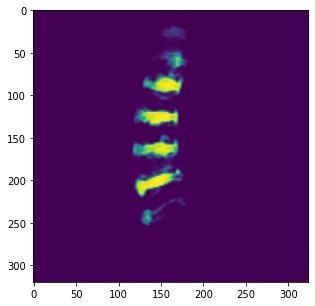

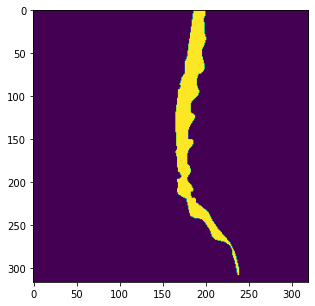

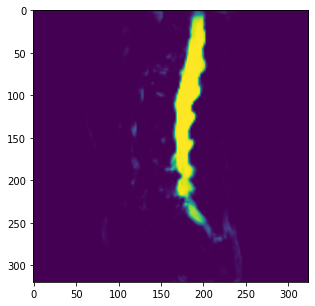

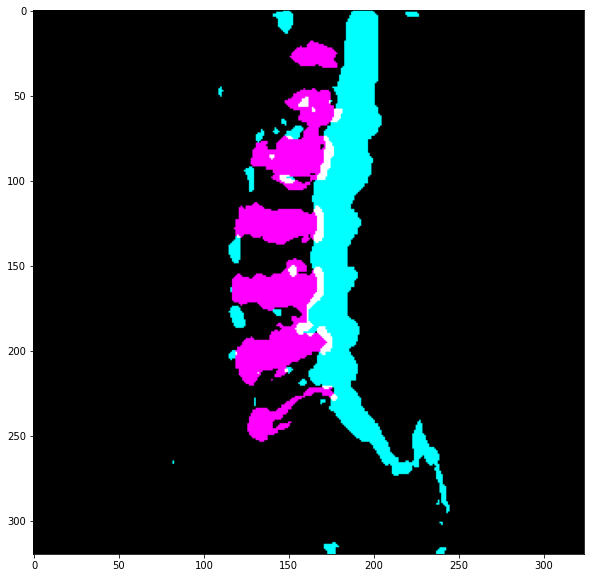

<Figure size 1440x1440 with 0 Axes>

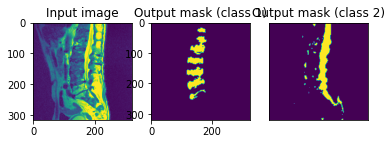

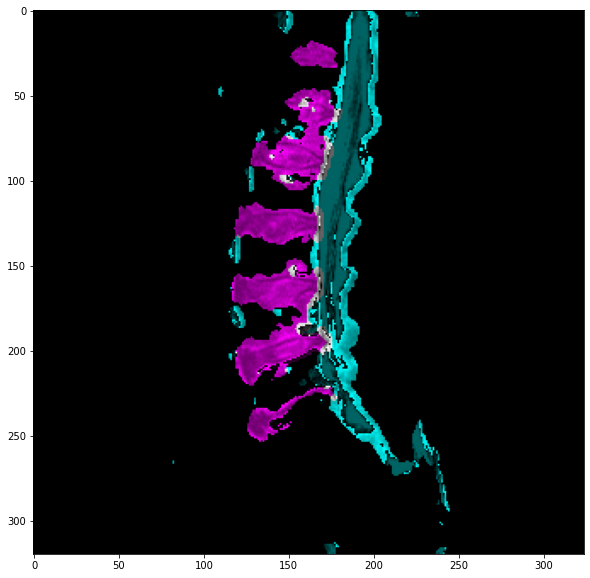

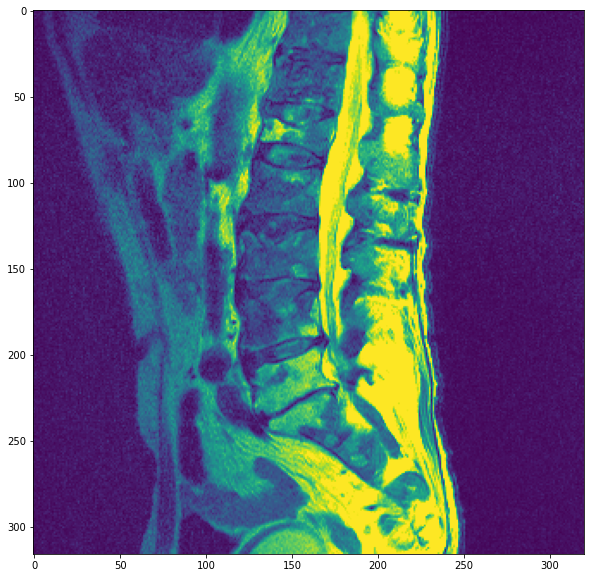

------------------------------------------------------------------------------------------

torch.Size([1, 2, 240, 256])
(2, 512, 546)
[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019

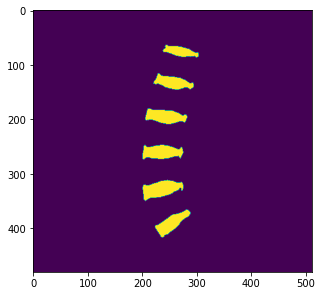

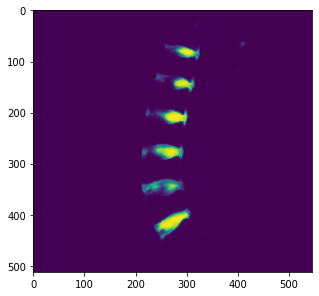

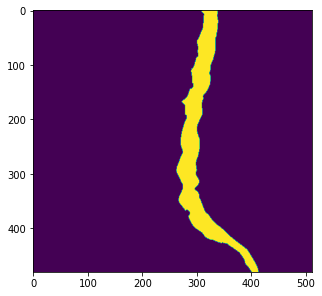

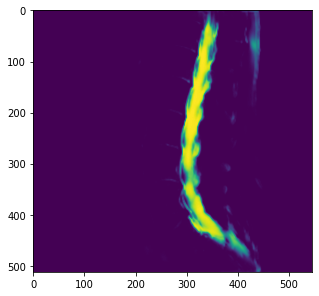

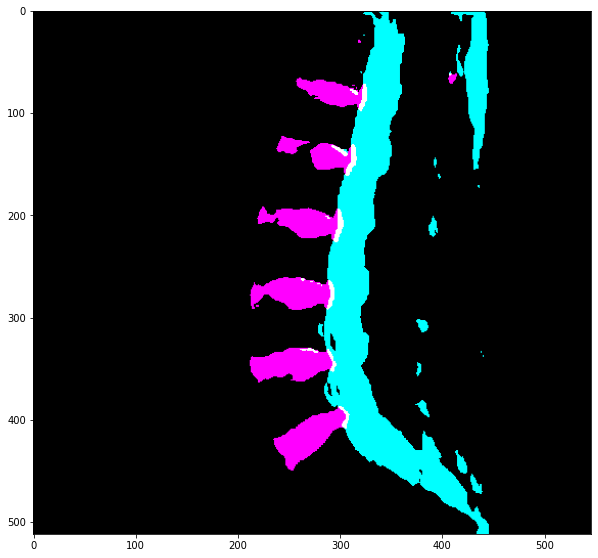

<Figure size 1440x1440 with 0 Axes>

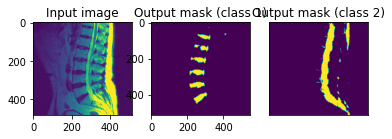

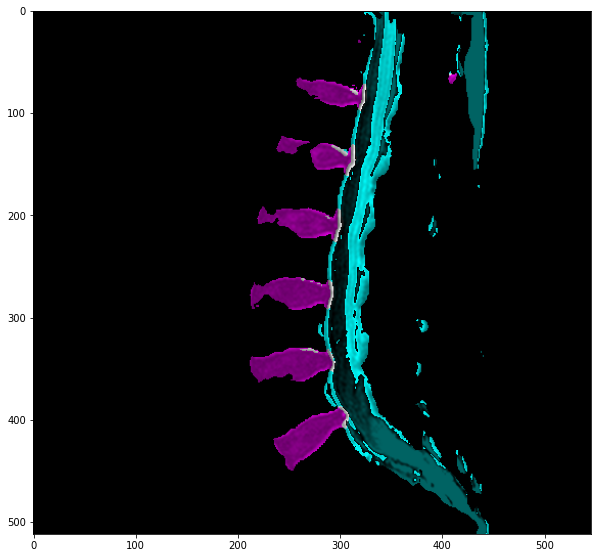

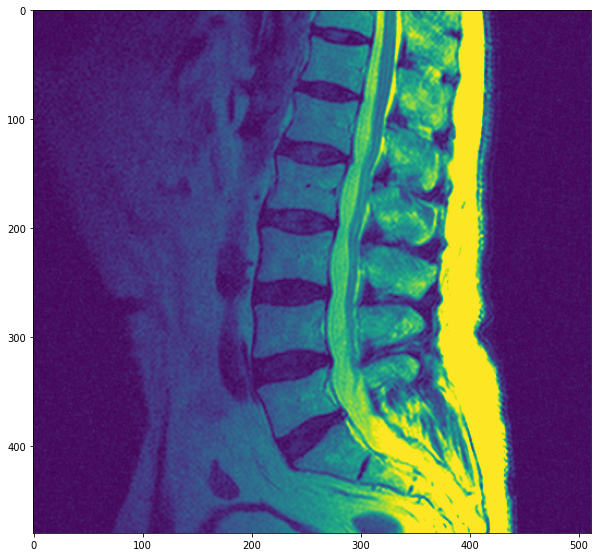

------------------------------------------------------------------------------------------



In [13]:
for i in range(len(infile_list)):
    
    in_files = infile_list[i]
    in_masks = inmask_list[i]

    img = Image.open(in_files)

    mask = predict_img(net=net,
                       full_img=img,
                       scale_factor=scale,
                       out_threshold=mask_threshold,
                       device=device)

    print(mask.shape)
    print(np.unique(mask))

    true_mask = cv2.imread(in_masks)
    print(np.unique(true_mask))

    plt.figure(figsize=(5,5))
    plt.imshow(true_mask[:,:,0] * 255)
    plt.show()
    plt.figure(figsize=(5,5))
    plt.imshow(mask[0])
    plt.show()

    true_mask = cv2.imread(in_masks)
    plt.figure(figsize=(5,5))
    plt.imshow(true_mask[:,:,1] * 255)
    plt.show()
    plt.figure(figsize=(5,5))
    plt.imshow(mask[1])
    plt.show()

    ########
    ### change the threshold param for better / worse results

    res_treshold = 0.05
    mask = np.array([mask[0] > res_treshold, mask[1] > res_treshold])

    ########

    plt.figure(figsize=(10,10))
    plt.imshow(np.moveaxis(np.array([mask[0,:,:] * 255,
                                     mask[1,:,:] * 255,
                                     (mask[0,:,:] + mask[1,:,:]) * 255]
                                   ),
                           0, 2)
              )
    plt.show()


    plt.figure(figsize=(20,20))
    plot_img_and_mask(img, mask)

    np_img = np.array(img.resize((mask[0].shape[1], mask[0].shape[0]))) +100

    plt.figure(figsize=(10,10))
    plt.imshow(np.moveaxis(np.array([mask[0,:,:] * np_img,
                                     mask[1,:,:] * np_img,
                                     (mask[0,:,:] + mask[1,:,:]) * np_img]
                                   ),
                           0, 2)
              )
    plt.show()

    plt.figure(figsize=(10,10))
    plt.imshow(img
              )
    plt.show()
    
    print('------------------------------------------------------------------------------------------\n')

## bad calc


In [9]:
infile_list = [

]

In [10]:
inmask_list = [
    
]

In [ ]:
for i in range(len(infile_list)):
    
    in_files = infile_list[i]
    in_masks = inmask_list[i]

    img = Image.open(in_files)

    mask = predict_img(net=net,
                       full_img=img,
                       scale_factor=scale,
                       out_threshold=mask_threshold,
                       device=device)

    print(mask.shape)
    print(np.unique(mask))

    true_mask = cv2.imread(in_masks)
    print(np.unique(true_mask))

    plt.figure(figsize=(5,5))
    plt.imshow(true_mask[:,:,0] * 255)
    plt.show()
    plt.figure(figsize=(5,5))
    plt.imshow(mask[0])
    plt.show()

    true_mask = cv2.imread(in_masks)
    plt.figure(figsize=(5,5))
    plt.imshow(true_mask[:,:,1] * 255)
    plt.show()
    plt.figure(figsize=(5,5))
    plt.imshow(mask[1])
    plt.show()

    ########
    ### change the threshold param for better / worse results

    res_treshold = 0.05
    mask = np.array([mask[0] > res_treshold, mask[1] > res_treshold])

    ########

    plt.figure(figsize=(10,10))
    plt.imshow(np.moveaxis(np.array([mask[0,:,:] * 255,
                                     mask[1,:,:] * 255,
                                     (mask[0,:,:] + mask[1,:,:]) * 255]
                                   ),
                           0, 2)
              )
    plt.show()


    plt.figure(figsize=(20,20))
    plot_img_and_mask(img, mask)

    np_img = np.array(img.resize((mask[0].shape[1], mask[0].shape[0]))) +100

    plt.figure(figsize=(10,10))
    plt.imshow(np.moveaxis(np.array([mask[0,:,:] * np_img,
                                     mask[1,:,:] * np_img,
                                     (mask[0,:,:] + mask[1,:,:]) * np_img]
                                   ),
                           0, 2)
              )
    plt.show()

    plt.figure(figsize=(10,10))
    plt.imshow(img
              )
    plt.show()
    
    print('------------------------------------------------------------------------------------------\n')